# Método de Euler

El método de Euler aproxima a la función incógnita por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t),t)
\end{align}

partimos de un punto inicial $(t_0, y_0)$ y a partir de él se calcula el valor de $y$ para el tiempo $t + \Delta t$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

## Ejemplo

Sea la ecuación
\begin{align}
  \frac{dy(t)}{dt} = -3.1 + 2.3 y sen(t)
\end{align}
con $y(0.5) = 4.3$

Se puede utilizar el método de Euler con $\Delta t = 0.0001$ para aproximar a la función $y(t)$ como segmentos sucesivos de sus tangentes.

Para estimar el error que cometemos en cada paso la fórmula entonces queda:
\begin{align}
  E = \frac{1}{2} \left[ 2.3\left(\frac{dy}{dt}sen(t) + ycos(t)\right) \right] (\Delta t)^2
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('bmh')

In [2]:
# Parámetros
t_0 = 0.5
y_0 = 4.3
delta = 0.0001
max_t = 30

# Inicialización
t = np.arange(t_0, max_t, delta)
y = np.zeros(len(t))
e = np.zeros(len(t))

In [3]:
print(t)

[ 0.5     0.5001  0.5002 ... 29.9997 29.9998 29.9999]


In [4]:
# Euler
y[0] = y_0
for i in range(len(t) - 1):
    f = -3.1 + 2.3 * y[i] * np.sin(t[i])
    y[i + 1] = y[i] + delta * f
    e[i + 1] = 2.3 * (f * np.sin(t[i]) + y[i] * np.cos(t[i])) * (delta**2) / 2

In [5]:
print(y)

[   4.3           4.30016415    4.30032841 ... -142.64895918 -142.61685108
 -142.58475078]


In [9]:
# Máximo valor absoluto del error al aproximar en el intervalo
e_max = np.max(np.abs(e))

# Acumulado en el intervalo.  Ojo que, si la pendiente cambia de signo
# los errores se pueden cancelar entre sí.
e_acum =np.sum(e)

print("E máx = ", e_max)
print("E acum = ", e_acum)

E máx =  2.3083166880140053e-05
E acum =  0.015964610682977783


Text(0, 0.5, 'y')

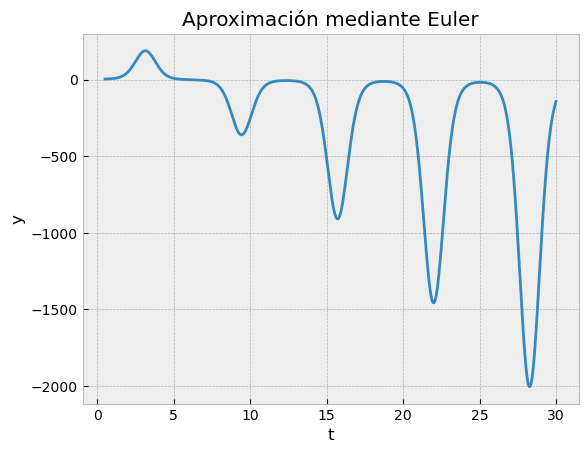

In [7]:
plt.plot(t, y)
plt.title("Aproximación mediante Euler")
plt.xlabel("t")
plt.ylabel("y")

In [8]:
# Versión interactiva
from ipywidgets import interact_manual
import ipywidgets as widgets

In [9]:
# Documentación:
# https://ipywidgets.readthedocs.io/en/7.6.2/examples/Widget%20List.html

@interact_manual(
    t_0 = widgets.FloatSlider(value=0.5, min=-10, max=10, step=0.2),
    y_0 = widgets.FloatSlider(value=4.3, min=-10.0, max=10.0),
    delta = widgets.FloatLogSlider(value=0.05, base=10,
                                 min=-5, # min exponent of base
                                 max=2, # max exponent of base
                                 step=0.2, # exponent step
                                 description='Log slider for Delta'),
    max_t = widgets.IntSlider(value=30, min=10, max=100),
)
def euler(t_0, y_0, delta, max_t):
    # Inicialización
    t = np.arange(t_0, max_t, delta)
    y = np.zeros(len(t))
    e = np.zeros(len(t))
    
    y[0] = y_0
    for i in range(len(t) - 1):
        f = -3.1 + 2.3 * y[i] * np.sin(t[i])
        y[i + 1] = y[i] + delta * f
        e[i + 1] = 2.3 * (f * np.sin(t[i]) + y[i] * np.cos(t[i])) * (delta**2) / 2
        
    # Máximo error al aproximar en el intervalo
    e_max = np.max(np.abs(e))

    # Acumulado en el intervalo
    e_acum =np.sum(e)

    print("E máx = ", e_max)
    print("E acum = ", e_acum)
        
    plt.plot(t, y)
    plt.title("Aproximación mediante Euler")
    plt.xlabel("t")
    plt.ylabel("y")

interactive(children=(FloatSlider(value=0.5, description='t_0', max=10.0, min=-10.0, step=0.2), FloatSlider(va…

**IMPORTANTE** Observa cómo cambia la forma de la función dependiendo del orden de magnitud de $\Delta$. En este ejemplo la función parece tener la forma correcta, pero **ve lo que pasó con la magnitud**.  Para que la aproximación sea válida $\Delta$ debe ser lo suficientemente pequeña para que la tangente sea una buena aproximación a la función.

# Sistema de dos ecuaciones

Supongamos que tenemos ahora un sistema de dos ecuaciones diferenciales.  Podemos utilizar una vez más el método de Euler para resolverlas, sólo debemos tener cuidado al asignar las condiciones iniciales y evaluar cada $f(t + \Delta t)$ en términos de los valores al tiempo $t$.

## Ejemplo

Sean las ecuaciones
\begin{align}
  \frac{dx(t)}{dt} &= t + cos(y) \\
  \frac{dy(t)}{dt} &= -3.1 + 2.3 y sen(x)
\end{align}
con $y(0.5) = 4.3$ y $x(y_0) = y_0 * 3.1$.

Usemos el método de Euler con $\Delta t = 0.0001$ para aproximar a la función $y(t)$ como segmentos sucesivos de sus tangentes.

In [10]:
def ejemplo_2(delta=0.0001):
    # Parámetros
    t_0 = 0.5
    y_0 = 4.3
    x_0 = y_0 * 3.1  # Inicializa x_0
    max_t = 30

    # Inicialización
    t = np.arange(t_0, max_t, delta)
    y = np.zeros(len(t))
    x = np.zeros(len(t))
    
    x[0] = x_0
    y[0] = y_0
    for i in range(len(t) - 1):
        f_1 = t[i] + np.cos(y[i])
        f_2 = -3.1 + 2.3 * y[i] * np.sin(x[i])
        x[i + 1] = x[i] + delta * f_1
        y[i + 1] = y[i] + delta * f_2
    
    return (t,x,y)

In [11]:
def plot_ejemplo_2():
    t, x, y = ejemplo_2()
    plt.plot(t,x,label="x")
    plt.plot(t,y,label="y")
    plt.title("Sistema de dos ecuaciones")
    plt.xlabel("$t$")
    plt.ylabel("$[adimensional]$")
    plt.legend()

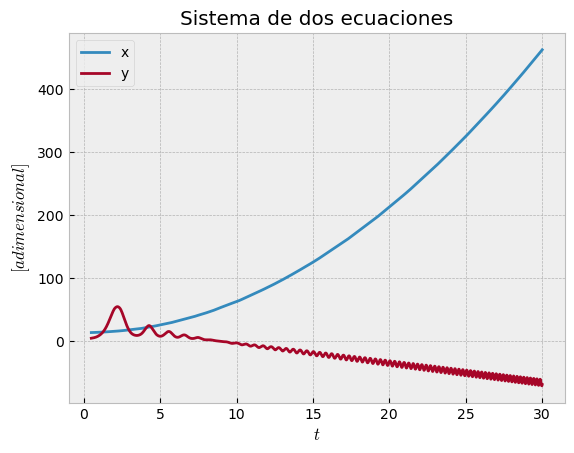

In [12]:
plot_ejemplo_2()

Prueba como ejercicio modificar las celdas anteriores para integrar con diferentes valores de $\Delta t$.

# Uso de bibliotecas especializadas

## Implementación usando odeint

Ahora, en lugar de implementar la integración numérica manualmente, utilizaremos una biblioteca de python.

In [13]:
from scipy.integrate import odeint

In [14]:
def modelo(y,t, A, B):
    """
    Calcula el valor de la derivada al tiempo t
    y: función desconocida
    t: variable independiente
    Se pueden recibir como parámetros otras variables que dependan del tiempo, como A y B.
    """
    dy_dt = A + B * y * np.sin(t)
    return dy_dt

In [15]:
# Usamos los mismos y_0 y t de arriba
resultado = odeint(modelo, y_0, t, args=(-3.1, 2.3))

**OJO:** estos tiempos fueron generados con delta = 0.0001, así que sigue siendo necesario explorar los posibles intervalos para determinar qué intervalo genera el resultado correcto.

Text(0, 0.5, 'y')

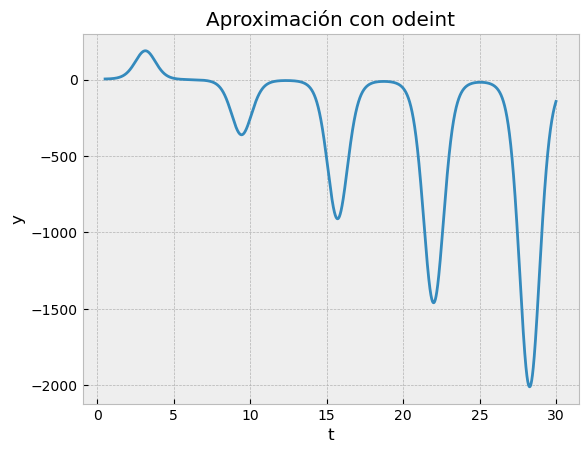

In [16]:
plt.plot(t, resultado)
plt.title("Aproximación con odeint")
plt.xlabel("t")
plt.ylabel("y")

In [17]:
# Para varios valores iniciales distintos:
y_0_set = [y_0 - 100, y_0, y_0 + 100]
resultado = odeint(modelo, y_0_set, t, args=(-3.1, 2.3))

Text(0.5, 1.0, 'Varias condiciones iniciales')

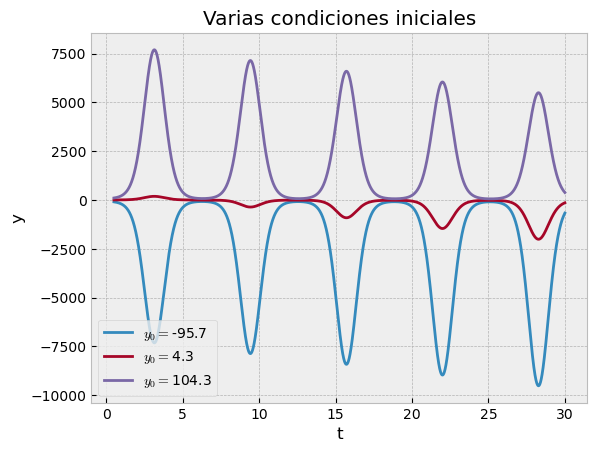

In [18]:
fig,ax = plt.subplots()
ax.plot(t,resultado[:,0],label='$y_0=$' + str(y_0_set[0]))
ax.plot(t,resultado[:,1],label='$y_0=$' + str(y_0_set[1]))
ax.plot(t,resultado[:,2],label='$y_0=$' + str(y_0_set[2]))
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.title("Varias condiciones iniciales")